In [1]:
# Modelo de AM para aplicação do algoritmo DecisionTreeClassifier
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Carregamento do banco de dados
arquivo = pd.read_csv('C:/UCPEL/IA-ML/EEG_Eye_State_Classification.csv')

In [3]:
# Visualização do conjunto de dados
arquivo.head(13180)

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.9000,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.8200,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.7200,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.3100,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.8200,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13175,4280.00,4007.69,4261.03,4107.69,4344.10,4615.90,4083.08,4631.28,4215.38,4240.00,4200.00,4278.97,4597.9500,4339.49,0
13176,4271.79,4006.67,4254.36,4109.74,4349.23,4621.03,4090.77,4629.23,4206.67,4236.92,4194.36,4270.26,4593.3300,4333.33,0
13177,4270.77,4011.79,4250.26,4116.92,4347.69,4624.10,4092.82,4628.21,4206.67,4228.72,4189.23,4262.05,4586.6700,4329.74,0
13178,4276.92,4013.85,4256.41,4115.90,4344.62,4618.97,4088.21,4628.21,4213.33,4226.67,4190.77,4264.10,4584.6200,4335.38,0


In [4]:
# Visualização do tamanho do banco de dados
arquivo.shape

(14980, 15)

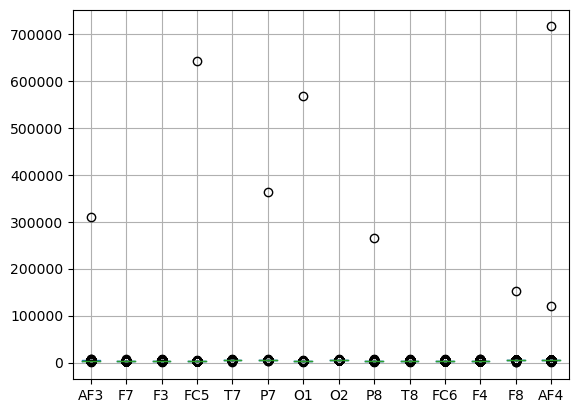

In [5]:
# Boxplot do Matplotlib
arquivo.boxplot(column=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4'])
plt.show()

C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='F8'>

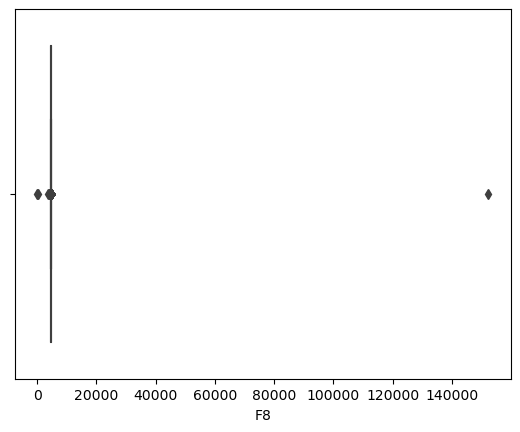

In [6]:
# Boxplot da biblioteca Seaborn (Atributo F8)
sns.boxplot(arquivo['F8'])

In [7]:
# Posição dos Outliers (Atributo F8)
print(np.where(arquivo['F8']<4000))
print(np.where(arquivo['F8']>5000))

(array([  898, 10386, 13179], dtype=int64),)
(array([11509], dtype=int64),)


In [8]:
# Método IQR para tratamento de Outliers (F8)
Q1 = np.percentile(arquivo['F8'], 25, interpolation = 'midpoint')
Q3 = np.percentile(arquivo['F8'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", arquivo.shape)

Old Shape:  (14980, 15)


In [9]:
# Upper bound
upper = np.where(arquivo['F8'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(arquivo['F8'] <= (Q1-1.5*IQR))

In [10]:
# Removendo outliers
arquivo.drop(upper[0], inplace=True)
arquivo.drop(lower[0], inplace=True)

print("New Shape: ", arquivo.shape)

New Shape:  (13520, 15)


C:\Users\tfwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='F8'>

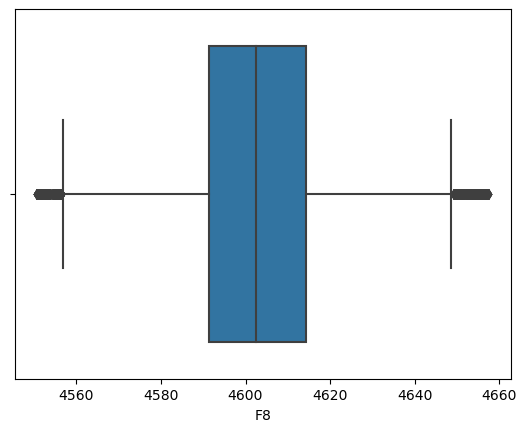

In [11]:
# Boxplot da biblioteca Seaborn (Atributo F8)
sns.boxplot(arquivo['F8'])

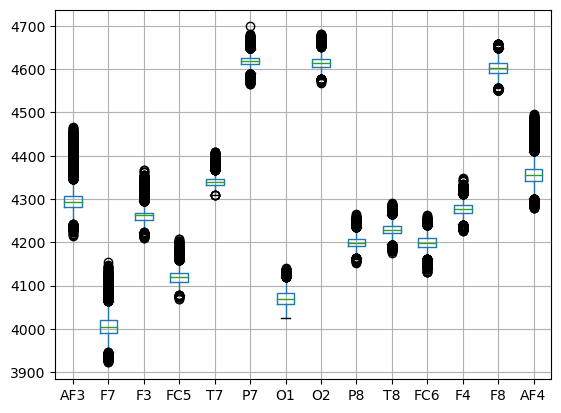

In [12]:
# Boxplot do Matplotlib
arquivo.boxplot(column=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4'])
plt.show()

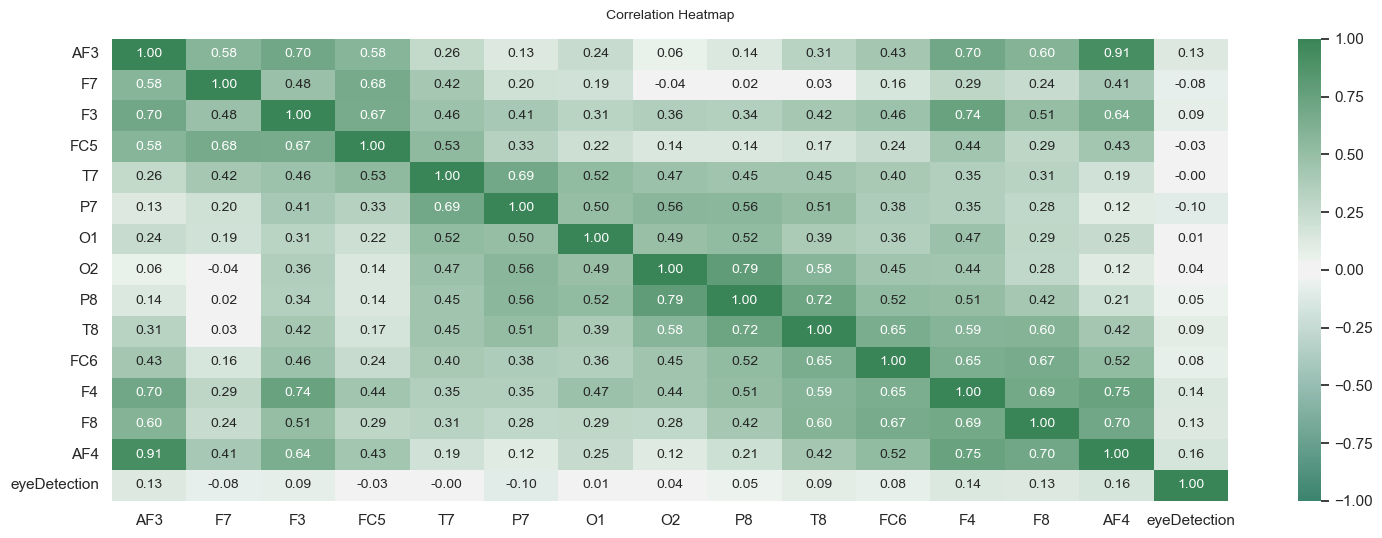

In [13]:
# Matriz de correlação (Biblioteca Seaborn), com os dados de correlação nas células
sns.set(font_scale=1)
plt.figure (figsize = (18, 6))
cmap = sns.diverging_palette(160, 140, sep=10, as_cmap=True)
heatmap = sns.heatmap(arquivo.corr(), cmap=cmap, annot=True, vmin=-1, vmax=1,fmt=".2f", annot_kws={'size':10})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=14);

In [14]:
# Separação das variáveis preditoras (características) e da variável-alvo (desfecho)
y = arquivo['eyeDetection']
x = arquivo.drop('eyeDetection', axis = 1)

In [15]:
# Criação dos conjuntos de treino e teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [16]:
# Quantidade de dados para treino
x_treino.shape

(9464, 14)

In [17]:
# Quantidade de dados para teste
x_teste.shape

(4056, 14)

In [18]:
# Criação do modelo
for i in range(100):
    modelo = DecisionTreeClassifier()
    modelo.fit(x_treino, y_treino)
    
    #Imprimindo resultados
    resultado = modelo.score(x_teste, y_teste)
    print("Acurácia", resultado)

Acurácia 0.8212524654832347
Acurácia 0.8242110453648915
Acurácia 0.8296351084812623
Acurácia 0.8254437869822485
Acurácia 0.8256903353057199
Acurácia 0.8229783037475346
Acurácia 0.8311143984220908
Acurácia 0.8261834319526628
Acurácia 0.8276627218934911
Acurácia 0.8251972386587771
Acurácia 0.8237179487179487
Acurácia 0.8284023668639053
Acurácia 0.8237179487179487
Acurácia 0.8286489151873767
Acurácia 0.8259368836291914
Acurácia 0.8256903353057199
Acurácia 0.8256903353057199
Acurácia 0.8224852071005917
Acurácia 0.8291420118343196
Acurácia 0.8224852071005917
Acurácia 0.8269230769230769
Acurácia 0.8256903353057199
Acurácia 0.8229783037475346
Acurácia 0.8291420118343196
Acurácia 0.8222386587771203
Acurácia 0.8251972386587771
Acurácia 0.8308678500986193
Acurácia 0.8229783037475346
Acurácia 0.8224852071005917
Acurácia 0.8227317554240631
Acurácia 0.828155818540434
Acurácia 0.8264299802761341
Acurácia 0.8279092702169625
Acurácia 0.8254437869822485
Acurácia 0.8276627218934911
Acurácia 0.8254437869

In [19]:
# Determinando a acurácia na amostra de treino
score_treino = modelo.score(x_treino, y_treino)
score_treino

1.0

In [20]:
# Realizando previsão na amostra de teste
y_previsto = modelo.predict(x_teste)
score_teste = modelo.score(x_teste, y_teste)
score_teste

0.8256903353057199

In [21]:
# Gerando Matriz de Confusão
cm = confusion_matrix(y_teste, y_previsto)
cm

array([[1934,  356],
       [ 351, 1415]], dtype=int64)

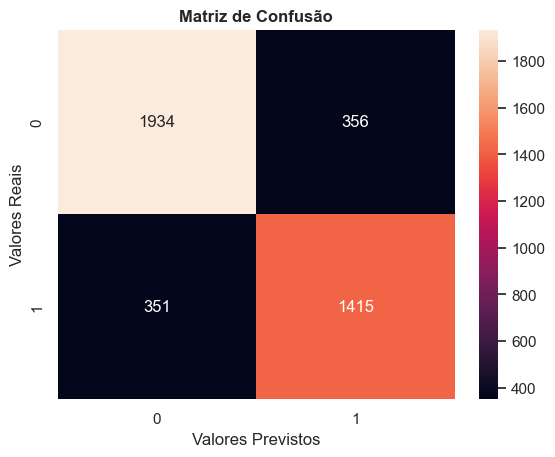

In [22]:
# Mapa de calor da Matriz de Confusão
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusão', weight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()